## Problem 1: Identifying Regulatory Elements

In [2]:
dna = "CTGACTAACAGCGCAGGCGAGCCGACCGGTGTTTACACGTTTCCCCC\
GCTGACTATATGTTCGTTTCCCCCGCTGACTAACAGCGCAGGCGAGCCGAC\
CGGTGCGATCTATAGGAGGTGCACGATGGAAGACGCCAAAAACATTAAGAA\
GGGCCCAGCGCCATTCTACCCA"

def find_indices_of_element(dna, element):
    element_length = len(element)
    indices = []
    for i in range(len(dna) - len(element) + 1):
        if (dna[i:i+element_length] == element):
            indices.append(i)
    return indices

print("Start indices of certain sequences:")
print("TTTACAC: " + str(find_indices_of_element(dna, "TTTACAC")))
print("TATATG: " + str(find_indices_of_element(dna, "TATATG")))
print("AGGAGG: " + str(find_indices_of_element(dna, "AGGAGG")))
print("ATG: " + str(find_indices_of_element(dna, "ATG")))
print()
print("difference between -35 and -10 sequences (expected 25): " + str(53 - 31))

# Could possibly write a method that made single bp modifications to the consensus sequences
# and then searched the whole sequence for a match. This would probably work in a recursive, 
# tree style manner that had some fixed depth of searching. It would then return the starting
# indices of successful matches, going in order of least modications to consensus to most.

# This probably be focused on single base changes, not about single base deletions or insertions,
# though that functionality could probably be added. Seems like a bit too much work for a problem
# like this, however.

Start indices of certain sequences:
TTTACAC: [31]
TATATG: [53]
AGGAGG: [111]
ATG: [56, 123]

difference between -35 and -10 sequences (expected 25): 22


The start codon will always be ATG, and this 3mer only occurs twice in the entire sequence. As the ribosome binding side (RBS) in prokaryotes is the Shine-Dalgarno region (consensus: AGGAGG), and the RBS occurs roughly eight base pairs ahead of the start codon, it is possible to identify which ATG 3mer is the actual start codon. Both of these regions are bolded below.

'5.....CTGACTAACAGCGCAGGCGAGCCGACCGGTGTTTACACGTTTCCCCC <br />
GCTGACTATATGTTCGTTTCCCCCGCTGACTAACAGCGCAGGCGAGCCGAC    <br />
CGGTGCGATCTAT**AGGAGG**TGCACG**ATG**GAAGACGCCAAAAACATTAAGAA <br />
GGGCCCAGCGCCATTCTACCCA.....3'

The promoter elements include the "TTGACAT" sequence, typically 35 bases in front of the transcription start site (TSS), and the "TATAAT" sequence, typically 10 bases in front of the TSS. The bolded regions below are, in order, the -35 promoter sequence, the -10 promoter sequence, the ribosome binding site, and the start codon.


'5.....CTGACTAACAGCGCAGGCGAGCCGACCGGTG**TTTACAC**GTTTCCCCC <br />
GCTGAC**TATATG**TTCGTTTCCCCCGCTGACTAACAGCGCAGGCGAGCCGAC    <br />
CGGTGCGATCTAT**AGGAGG**TGCACG**ATG**GAAGACGCCAAAAACATTAAGAA <br />
GGGCCCAGCGCCATTCTACCCA.....3'

The difference between the starts of the "TTTACAC" sequence and the "TATATG" sequence is 22 basepairs, which is reasonable because the expected difference between them is 25 basepairs (-10 - (-35)). 

## Problem 3: Simulating CRNs

In [7]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [8]:
#####
#
# TODO: Implement a function that returns the first order derivatives of c 
# (the concentration vector (c_a(t), c_b(t), c_c(t))).
# The function takes as input the concentration vector c,
# the time vector t and rate constants k1, k2 and k3.
#
#####
def get_ode_derivatives(c, t, k1, k2, k3):
    
    c_a, c_b, c_c = c
    
    # The below equations were derived by hand for Problem 3 of the worksheet. 
    # Perhaps the work for this could be shown in an earlier cell (this has not
    # been done yet).
    dcdt = [
        ((-k1 * c_a * c_b) + (k3 * c_a * c_c)), # d/dt(c_a)
        ((-k2 * c_b * c_c) + (k1 * c_b * c_a)), # d/dt(c_b)
        ((-k3 * c_c * c_a) + (k2 * c_c * c_b))  # d/dt(c_c)
    ]
    
    return dcdt


Solving ODE for
c0_a = 0.2
c0_b = 0.3
c0_c = 0.5
Solving ODE for
c0_a = 0.05
c0_b = 0.9
c0_c = 0.05


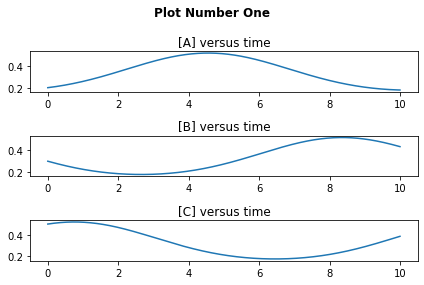

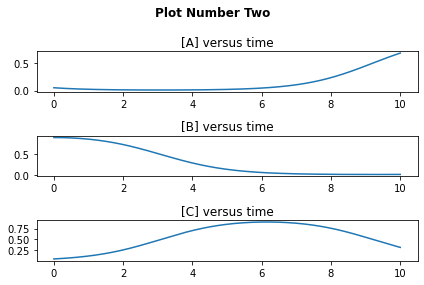

In [9]:
# Solves an ODE, taking as input the above derivative functions, initial conditions
# of the concentrations, numerical values for rate constants, and a time vector
def solve_crn_ode(deriv_function, c0, time, k):
    k1, k2, k3 = k
    a = sp.integrate.odeint(get_ode_derivatives, c0, time, args=(k1, k2, k3))
    return np.array(a).T  # return the transposed array

# takes in the time array, the solution array, and an array of the names of the variables.
# it will make one figure with all of them, and return the figure and array of axes
def print_crn_solution(time, array_sol, var_names):
    num_vars, length = array_sol.shape
    fig, axs = plt.subplots(nrows=num_vars)
    # the below loop creates the graph for each variable
    for ax, row, name in zip(axs, array_sol, var_names):
        ax.plot(time, row)
        ax.set_title(name + " versus time")
    return fig, axs


# The rate reaction constants
k1 = 1
k2 = 1
k3 = 1
k = (k1, k2, k3)

t0 = 0          # Initial time    init:    0 
tn = 10         # Final time      init:   10
tsteps = 1001   # Number of steps init: 1001
time_vector = np.array(np.linspace(t0, tn, tsteps))

# Initial concentrations for CRN 1.
c0_a = 0.2
c0_b = 0.3
c0_c = 0.5
c0 = [c0_a, c0_b, c0_c]

print('Solving ODE for')
print('c0_a = ' + str(c0_a))
print('c0_b = ' + str(c0_b))
print('c0_c = ' + str(c0_c))

sol1 = solve_crn_ode(get_ode_derivatives, c0, time_vector, k)
    
names = ["[A]", "[B]", "[C]"]
fig1, axs1 = print_crn_solution(time_vector, sol1, names)
fig1.suptitle("Plot Number One", weight='bodld')
fig1.tight_layout()
    
#TODO: Write code that numerically solves the ODE using scipy.integrate.odeint.
#      odeint expects your derivative-function implemented in the cell above as input,
#      along with the initial condititions, rate constants, and a vector of time.
#      For a brief tutorial, look at:
#      https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint
#TODO: Write code that plots the solution curves of the ODE.
#      Use the matplotlib.pyplot library for this.

# Initial concentrations for CRN 2.
c0_a = 0.05
c0_b = 0.90
c0_c = 0.05
c0 = [c0_a, c0_b, c0_c]

print('Solving ODE for')
print('c0_a = ' + str(c0_a))
print('c0_b = ' + str(c0_b))
print('c0_c = ' + str(c0_c))

sol2 = solve_crn_ode(get_ode_derivatives, c0, time_vector, k)
fig2, axs2 = print_crn_solution(time_vector, sol2, names)
fig2.suptitle("Plot Number Two", weight='bold')
fig2.tight_layout()


## Problem 4

In [ ]:
def get_grad_ode_derivatives(c, t, k):
    c_x, c_y, c_b = c
    
    # The below equations were derived by hand for Problem 3 of the worksheet. 
    # Perhaps the work for this could be shown in an earlier cell (this has not
    # been done yet).
    dcdt = [
        k * (c_x*c_b - c_x*c_y), # d/dt(c_x)
        k * (c_y*c_b - c_x*c_y), # d/dt(c_y)
        k * (-c_x*c_b - c_y*c_b + 2*c_x*c_y)  # d/dt(c_b)
    ]
    
    return dcdt
    
def run_grad_sims():
    fig_grad, axs_grad = plt.subplots(6)
    for i in range(6):
        # Because of the symmetricity of the equations, only really need to check
        # half the possibilities. This will check c_x = 0, c_y = 1; c_x = 0.1, c_y = 0.9
        # .... c_x = 0.5, c_y = 0.5
        c0_x = i / 10
        c0_y = 1 - c_x
        c0_b = 0
        c0 = [c0_x, c0_y, c0_b]
        t0 = 0          # Initial time    init:    0 
        tn = 10         # Final time      init:   10
        tsteps = 1001   # Number of steps init: 1001
        time = np.array(np.linspace(t0, tn, tsteps))
        k = 1
        sol = solve_crn_ode(get_grad_ode_derivatives, c0, time, k)
        names = ["[X]", "[Y]", "[B]"]
        plt.figure(i + 1)
        fig, ax = print_crn_solution(time, sol, names)
        
def new_plotter()
        
    
    